In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [3]:
#read data
df = pd.read_excel('EersteData.xlsx')

df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,Start Date,2000-12-29 00:00:00,NaN,NaN
8,NaN,NaN,NaN,End Date,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,MSCI AC World Index EUR Net,MSCI ACWI GDP Net Local,FTSE ALL WORLD


In [4]:
#drop unnecessary blanks
df.drop(df.columns[:3], axis=1, inplace=True)
df.drop(df.index[:13], axis=0, inplace=True)
df.head(10)

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
13,NaN,100,NaN,NaN
14,2001-01-01 00:00:00,99.995,877.613,NaN
15,2001-01-02 00:00:00,97.602,866.1976,NaN
16,2001-01-03 00:00:00,99.782,879.6873,NaN
17,2001-01-04 00:00:00,100.061,885.8732,NaN
18,2001-01-05 00:00:00,98.131,878.9521,NaN
19,2001-01-08 00:00:00,97.966,877.6508,NaN
20,2001-01-09 00:00:00,98.477,877.3933,NaN
21,2001-01-10 00:00:00,98.592,877.6931,NaN
22,2001-01-11 00:00:00,98.485,881.8358,NaN


In [5]:
#toevoegen eerste cel GDP want wilt niet readen voor een bepaalde reden?
df.iloc[0, 2] = 877.689

In [6]:
#add column names
df.columns = ['Date', 'MSCI AC World Index EUR Net', 'MSCI ACWI GDP Net Local', 'FTSE ALL WORLD']
df.head()

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net Local,FTSE ALL WORLD
13,NaN,100,877.689,NaN
14,2001-01-01 00:00:00,99.995,877.613,NaN
15,2001-01-02 00:00:00,97.602,866.1976,NaN
16,2001-01-03 00:00:00,99.782,879.6873,NaN
17,2001-01-04 00:00:00,100.061,885.8732,NaN


In [7]:
#MSCI GDP percentage change
df['PercentageChange'] = df['MSCI ACWI GDP Net Local'].pct_change() +1
df.loc[:13, 'PercentageChange'] = 1

#create new column for MSCI GDP
df['MSCI ACWI GDP Net'] = np.nan
df.loc[:13, 'MSCI ACWI GDP Net'] = 100

df.head()

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net Local,FTSE ALL WORLD,PercentageChange,MSCI ACWI GDP Net
13,NaN,100,877.689,NaN,1.000000,100.0
14,2001-01-01 00:00:00,99.995,877.613,NaN,0.999913,NaN
15,2001-01-02 00:00:00,97.602,866.1976,NaN,0.986993,NaN
16,2001-01-03 00:00:00,99.782,879.6873,NaN,1.015573,NaN
17,2001-01-04 00:00:00,100.061,885.8732,NaN,1.007032,NaN


In [8]:
#apply formula
for i in range(14, len(df)):
    df.loc[i, 'MSCI ACWI GDP Net'] = df.loc[i-1, 'MSCI ACWI GDP Net'] * df.loc[i, 'PercentageChange']
    
df.head()

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net Local,FTSE ALL WORLD,PercentageChange,MSCI ACWI GDP Net
13,NaN,100,877.689,NaN,1.000000,100.000000
14,2001-01-01 00:00:00,99.995,877.613,NaN,0.999913,99.991341
15,2001-01-02 00:00:00,97.602,866.1976,NaN,0.986993,98.690721
16,2001-01-03 00:00:00,99.782,879.6873,NaN,1.015573,100.227677
17,2001-01-04 00:00:00,100.061,885.8732,NaN,1.007032,100.932472


In [9]:
#isolating relevant indices
df2 = df.loc[:,['Date', 'MSCI AC World Index EUR Net', 'MSCI ACWI GDP Net']]

df2.head()

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net
13,NaN,100,100.000000
14,2001-01-01 00:00:00,99.995,99.991341
15,2001-01-02 00:00:00,97.602,98.690721
16,2001-01-03 00:00:00,99.782,100.227677
17,2001-01-04 00:00:00,100.061,100.932472


<AxesSubplot:xlabel='Date'>

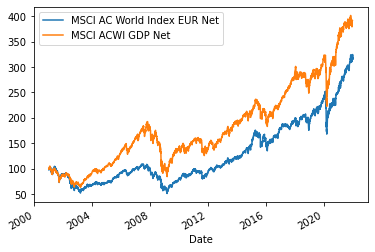

In [10]:
#plotting function
df2.set_index('Date', inplace=True)
df2.plot()

In [12]:
#probeersel decomposition
time_series = df['MSCI AC World Index EUR Net']
type(time_series)

pandas.core.series.Series

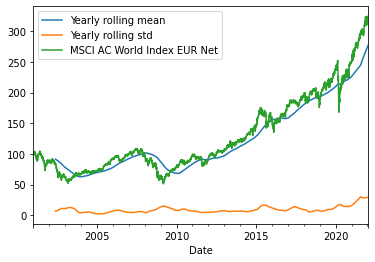

In [13]:
#decompose for fluctuations
time_series.rolling(365).mean().plot(label='Yearly rolling mean')
time_series.rolling(365).std().plot(label='Yearly rolling std')
time_series.plot()
plt.legend()

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomp = seasonal_decompose(time_series)

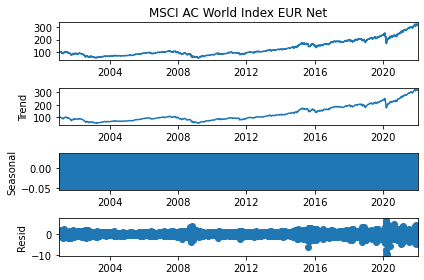

In [17]:
fig = decomp.plot()

In [11]:
#decomposition niet op juiste cyclus